# Cleaning Data in R

## Importing the data

The raw data is given at us in the form of a comma-separated values. It is located in _raw_housing.csv_ which is located in the current working directory We firstly need to import the data. We will use the __tidyverse__ library. __tidiverse__ library is a useful R package for Data Science.

In [1]:
library(tidyverse)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──
✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  3.0.0     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.4.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


We use __readr__ package, contained in the __tidyverse__ package, to automatically read the columns that contains text values to a column of type _character_. Using the R built-in _read.csv()_ function would read those columns as _factors_ R data type, which we would have to re-convert to _character_. Our data is a __tibble__, contrary to a __data frame__ that the built-in _read.csv()_ would have return. A __tibble__ makes the dataset more manipulatable for cleaning than a __data frame__ would do. Let's inspect the beginning of the dataset.

In [2]:
path <- getwd()
filename <- "raw.csv"
fullpath <- file.path(path, filename)
data <- read_csv(fullpath)

Parsed with column specification:
cols(
  MLS = col_double(),
  sold_price = col_double(),
  zipcode = col_double(),
  longitude = col_double(),
  latitude = col_double(),
  lot_acres = col_double(),
  taxes = col_double(),
  year_built = col_double(),
  bedrooms = col_double(),
  bathrooms = col_double(),
  sqrt_ft = col_character(),
  garage = col_character(),
  kitchen_features = col_character(),
  fireplaces = col_double(),
  floor_covering = col_character(),
  HOA = col_character()
)
Warning message:
“6 parsing failures.
 row       col expected actual                                                   file
2026 bathrooms a double   None '/home/makba/Documents/EIT/cleaning_data_in_R/raw.csv'
2767 bathrooms a double   None '/home/makba/Documents/EIT/cleaning_data_in_R/raw.csv'
3109 bathrooms a double   None '/home/makba/Documents/EIT/cleaning_data_in_R/raw.csv'
3530 bathrooms a double   None '/home/makba/Documents/EIT/cleaning_data_in_R/raw.csv'
3823 bathrooms a double   None '/home/

We can start by having a look of the dataset shape.

In [3]:
nrow(data)
ncol(data)

[1] 5000

[1] 16

This dataset is composed of 5000 houses described with 16 variables.

We see from the console that there are 5 cells from the csv file are generating problems. As the majority of the bathrooms data are double, _read_csv()_ is expecting every cell to be of the type __double__. However, the bathrooms value at rows 2026, 2767, 3109, 3530 and 3823 is equal to None, which means that the dataset does not have information about the number of bathrooms for those houses. Let's explore those houses to see if the rest of the data is inadequate.

In [4]:
houses_no_bathrooms <- data[2026,]
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[2767,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3109,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3109,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3530,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3823,])
houses_no_bathrooms

MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
3044867,660000,85614,-110.9695,31.83672,3.60,5526.00,2007,3,NA,None,3,"Desk, Dishwasher, Garbage Disposal, Gas Range, Island, Lazy Susan, Pantry: Closet, Refrigerator, Water Purifier, Microwave, Oven",NA,"Carpet, Other: Tile-Other","1,000"
3042851,575000,85614,-110.9605,31.85445,0.87,4623.05,2002,3,NA,None,3,"Dishwasher, Garbage Disposal, Gas Range, Island, Lazy Susan, Pantry: Butler, Refrigerator, Water Purifier, Microwave, Oven",NA,"Carpet, Other",250
3047540,610000,85614,-111.0025,31.84006,1.70,3800.00,2007,3,NA,None,3,None,NA,None,"1,200"
3047540,610000,85614,-111.0025,31.84006,1.70,3800.00,2007,3,NA,None,3,None,NA,None,"1,200"
3046317,535000,85614,-110.9864,31.80661,4.27,3826.25,2006,2,NA,None,3,"Dishwasher, Garbage Disposal, Gas Range, Island, Pantry: Butler, Refrigerator, Water Purifier",NA,"Carpet, Other: Tile-Other",None
3045347,550000,85614,-111.0088,31.84114,0.99,3702.07,2007,2,NA,None,3,"Dishwasher, Garbage Disposal, Island, Lazy Susan, Pantry: Closet, Microwave",NA,"Carpet, Other: Tile-Other","1,200"


Because each columns are composed of only one variable and each row a house, the dataset is in the form of tidy data and not wide data. Thus, we don't have to reshape the data and we can use the structure of the dataset of the original file.

We see that the bathrooms column is not the only one problematic. _sqrt_ft_ and _fireplaces_ are populated with __NA__ for those 6 houses. _kitchen_features_, _floor_covering_ and HOA have some None value too. Those ones were not prompted by warnings from the console, because _read_csv()_ considered them as being __character__ columns. __HOA__ should be of numeric type and not __character__. Having commas for the values of it misinterpreted them as none numeric values. Therefore, from this subset, we see that multiple variables should be inspected and cleaned. Let's start with __bathrooms__.

## Removing outliers

For the sold price, we need to make sure that the values are numeric, that there is no NAs and that there is no negative values.

In [5]:
class(data$sold_price)

[1] "numeric"

In [6]:
nrow(filter(data, is.na(data$sold_price)))

[1] 0

In [7]:
nrow(filter(data, data$sold_price <= 0))

[1] 0

The sold price will be the main variable of interest for a lot of analysis. We should then use this variable to remove outliers. We start by drawing a boxplot.

In [8]:
k_scale <- data$sold_price/1000000

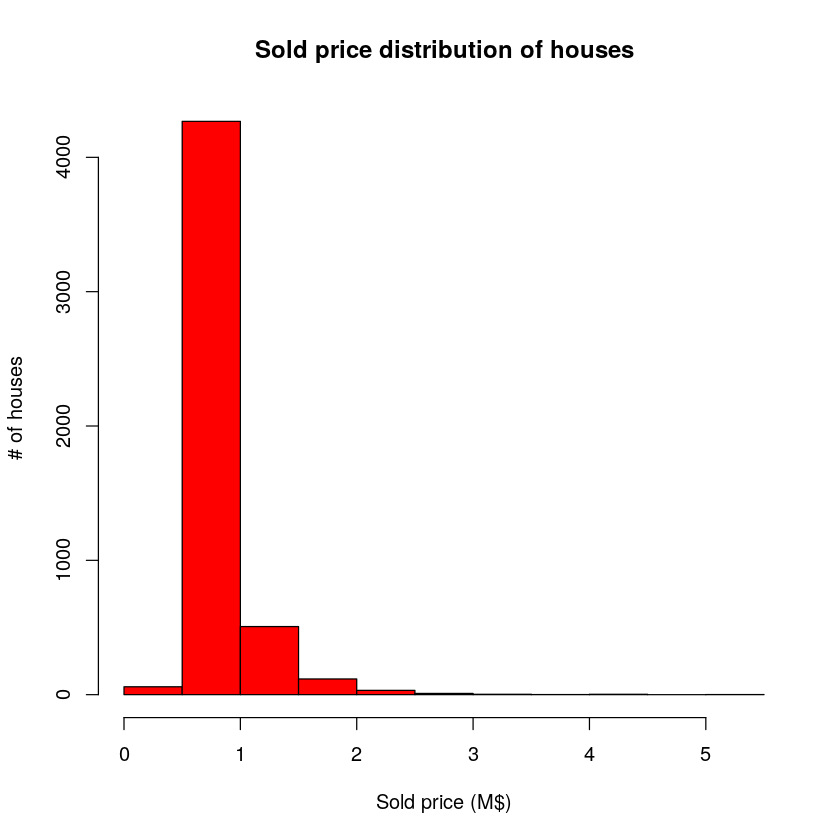

In [9]:
hist(k_scale, 
     main="Sold price distribution of houses",
     xlab="Sold price (M$)",
     ylab="# of houses",
     border="black",
     col="red"
     )

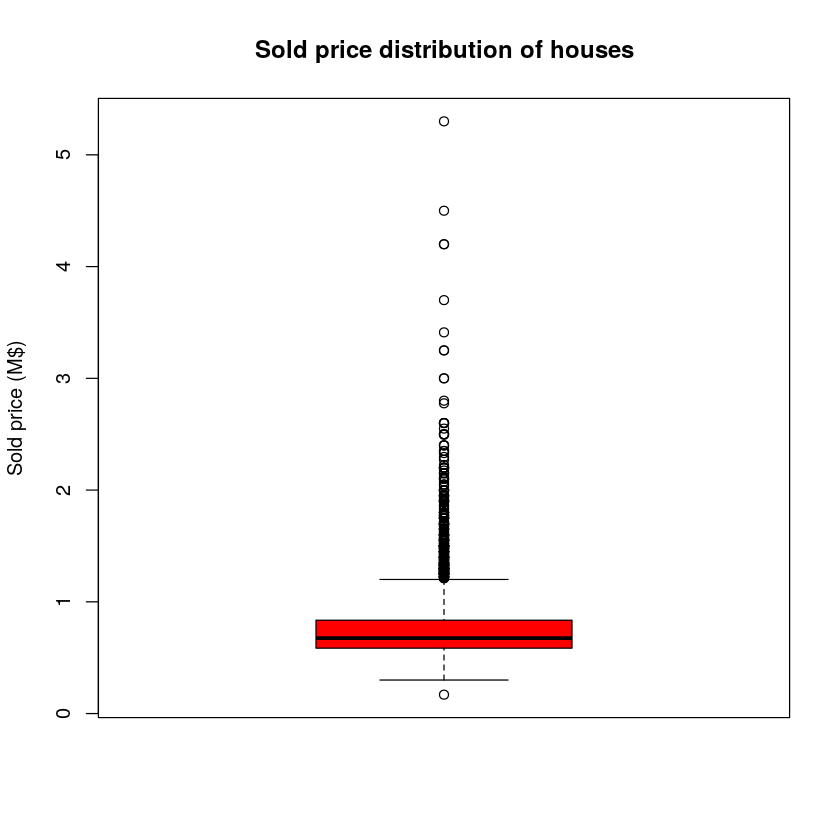

In [10]:
boxplot( k_scale,
         main="Sold price distribution of houses",
         ylab="Sold price (M$)",
         border="black",
         col="red"
        )

There seems to be a lot of outliers (a lot of houses are above or below  the 75% upper quartile and 25% lower quartile. In R, we can get the outliers with the variable $out from the boxplot. And remove them from our dataset replot the diagrams to see if it worked correctly.

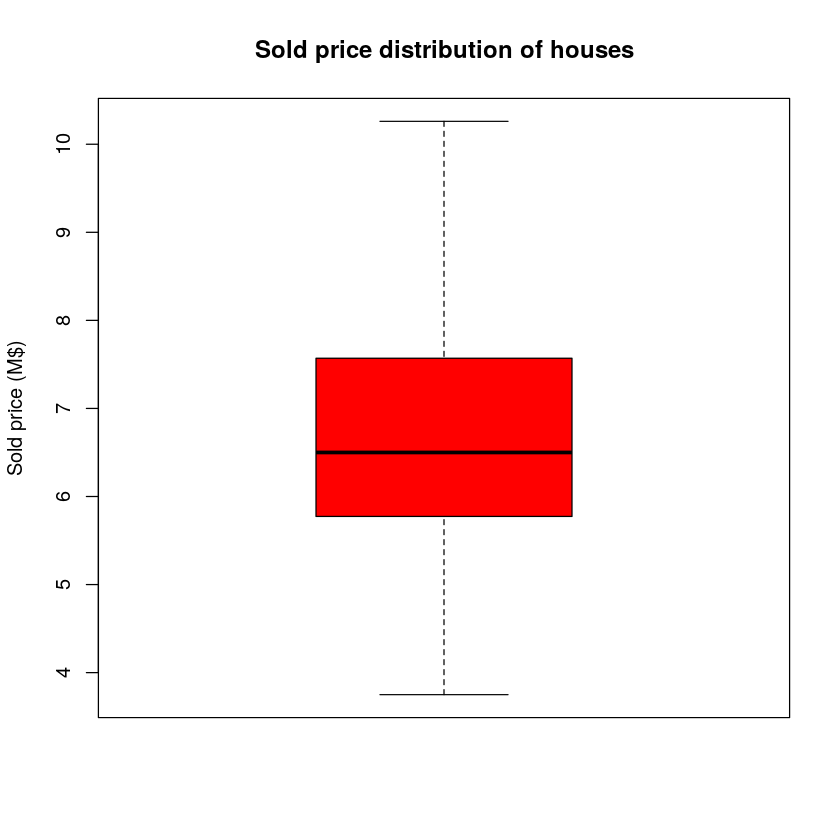

In [11]:
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
outliers <- boxplot(data$sold_price, plot=FALSE)$out
data <- data[-which(data$sold_price %in% outliers),]
k_scale <- data$sold_price/100000
boxplot(k_scale,
         main="Sold price distribution of houses",
         ylab="Sold price (M$)",
         border="black",
         col="red")

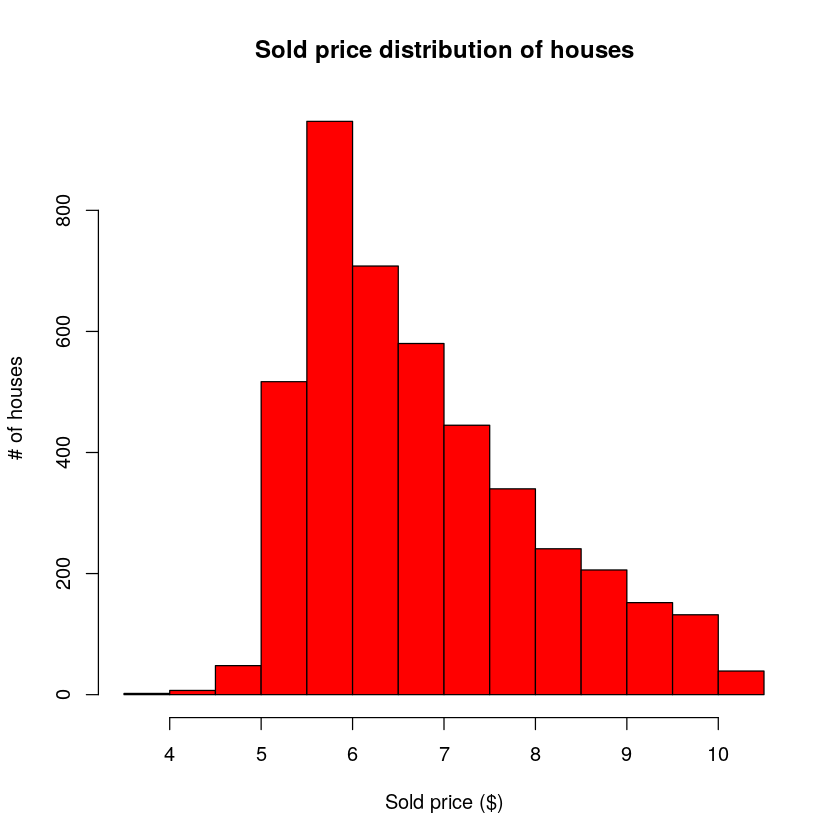

In [12]:
hist(k_scale, 
     main="Sold price distribution of houses",
     xlab="Sold price ($)",
     ylab="# of houses",
     border="black",
     col="red"
     )

The sold price distribution is now more of a normal shape.

## Cleaning bathrooms

There are only 5 houses with no information about the number of bathrooms. However, we have a lot of the information about the other variables available. Thus, we can choose to not discard those houses from the dataset, but fix a value to the number of bathrooms they have. This process is adding bias to our dataset, but as we want a clean dataset for our analysis, it is worth the change. As we can guess that the number of bathrooms is proportial to the number of bedrooms, we can imputate the missing values with the mean number of bathrooms for the house with same number of bedrooms. We see that the missing values are for houses with 2 and 3 bedrooms. We then need to create two subsets; one composed of the houses with 2 bedrooms and another with the houses of 3 bedrooms.

In [13]:
houses_2_bedrooms <- filter(data, bedrooms == 2)
houses_3_bedrooms <- filter(data, bedrooms == 3)
mean_bathrooms_2_bedrooms <- mean(houses_2_bedrooms$bathrooms, na.rm=TRUE)
mean_bathrooms_3_bedrooms <- mean(houses_3_bedrooms$bathrooms, na.rm=TRUE)
mean_bathrooms_2_bedrooms
mean_bathrooms_3_bedrooms

[1] 2.84375

[1] 3.279216

In [14]:
p_value <- cor(data$bedrooms[!is.na(data$bedrooms),data$bathrooms)
p_value

ERROR: Error in parse(text = x, srcfile = src): <text>:1:66: unexpected ')'
1: p_value <- cor(data$bedrooms[!is.na(data$bedrooms),data$bathrooms)
                                                                     ^


The number of bathrooms need to be an integer. Thus, we can round the means to 3 and clean the missing values assuming the houses have 3 values.

In [ ]:
data <- data %>% mutate(bathrooms = replace_na(bathrooms, 3))
houses_no_bathrooms <- data[2026,]
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[2767,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3109,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3109,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3530,])
houses_no_bathrooms <- add_row(houses_no_bathrooms,data[3823,])

Let's make sure too that our data is numeric.

In [ ]:
class(data$bathrooms)

## Cleaning fireplaces

We saw that there is at least 6 houses that do not have data about fireplaces. Let's look how many houses we have without this information. 

In [ ]:
fireplaces <- data$fireplaces
class(fireplaces)

In [ ]:
fireplaces_na <- filter(data, is.na(fireplaces))

In [ ]:
print(paste('Number of houses without fireplaces data: ', nrow(fireplaces_na)))

Like for the bathrooms, there is not a big proportion of houses that do not have fireplaces data. In contrary to the bathrooms, it is difficult to link the influence of another variable to the fact that an house has a fireplace or not. We then can not rely on another feature to base a mean value and imputate with it. We will compute the mean of fireplaces of all the houses and use this value to imputate.

In [ ]:
mean_fireplaces <- mean(data$fireplaces, na.rm = TRUE)
mean_fireplaces

Surprisingly, there is an average of around 2 fireplaces by house. We might want to check if there is a correlation with the year that the house were built, as we might think that older houses have a bigger chance to have a fireplace.

In [ ]:
galton_heights <- data %>% select(year_built, fireplaces)

In [ ]:
galton_heights %>% summarize(mean(year_built), sd(year_built), mean(fireplaces, na.rm=TRUE), sd(fireplaces, na.rm=TRUE))

In [ ]:
galton_heights %>% ggplot(aes(year_built, fireplaces)) + geom_point(alpha=0.5)

Unfortunately, we can see from the last graph that there are some house in our dataset that has a built year equal to 0. We will clean this column before going further in our correlation analysis.

## Cleaning year built

In [ ]:
class(data$year_built)

The oldest house in USA is Fairbanks House, built between 1637 - 1641. We can use 1637 has a threshold for the year built of the house.

In [ ]:
year_built_0 <- filter(data, data$year_built < 1637)
year_built_0

We might want to discard those 5 houses with year 0, but because we have the rest of the information for the other variables, it might be good to keep them but imputate the year_built. Let's imputate with the mean.

In [ ]:
year_built_non_zero <- filter(data, data$year_built > 0)
summary(year_built_non_zero$year_built)

Let's substitute the houses' year built of 0 to 1994.

In [ ]:
data$year_built[data$year_built == 0] <- 1994

And make sure that there is no year built of 0.

In [ ]:
nrow(filter(data, data$year_built == 0))

In [ ]:
known_fireplaces <- subset(data, !is.na(fireplaces))
random_subset <- data[-sample(1:nrow(data), 25), ]
p_value <- cor(random_subset$year_built, known_fireplaces$fireplaces)
p_value

Because the p-value is really close to 0, we can not assume that there is a correlation betwwen the year built and the number of fireplaces. 2 fireplaces per house looks a little high. From a reference of Statista, the majority of the houses that have one or more fireplaces have one (https://www.statista.com/statistics/943717/us-fireplaces-in-single-family-homes/). To clean our data of fireplaces, let's then use 1 instead of 2 (the rounded result of the mean). That shows us that adding data can help make better assumptions.

### Recleaning fireplaces

In [ ]:
data$fireplaces[is.na(data$fireplaces)] <- 1

In [ ]:
nrow(filter(data, is.na(data$fireplaces == 0)))

## Cleaning HOA

The HOA column has some number with the thousands separated by commas. We can confirm that by looking at the class of the HOA column. It should be __character__.

In [ ]:
class(data$HOA)

We need to convert those values to numeric values. With the next line of code, the _None_ values will be converted to _NA_.

In [ ]:
data$HOA <- as.numeric(gsub(",", "", as.character(data$HOA)))

In [ ]:
class(data$HOA)

In [ ]:
HOA_na <- filter(data, is.na(data$HOA))
nrow(HOA_na)

There are too much rows to discard them. We will use the mean to imputate it, but we should take note that ~10% of the HOA values have been imputated. Therefore, when one is analysing the data, he has to be careful when using the HOA. The marge of error when using this variable is augmenting, as we are using a lot of imputated data.

In [ ]:
HOA_not_na <- filter(data, !is.na(data$HOA))
summary(HOA_not_na$HOA)

In [ ]:
data$HOA[is.na(data$HOA)] <- 78.09

In [ ]:
nrow(filter(data, is.na(data$HOA)))

## MLS

In real estate, MLS can be considered as a unique identifier for an house for sale. Thus, for this variable, we need to make sure that this none None values or values of 0.

In [ ]:
class(data$MLS)

In [ ]:
nrow(filter(data, is.na(data$MLS)))

## Zip code

In [ ]:
class(data$zipcode)

In [ ]:
nrow(filter(data, is.na(data$zipcode)))

An US zip code is a 5-digit number. We can do this in R with a regular expression.

In [ ]:
zipcodes <- data$zipcode
for(i in 1:length(zipcodes)){
    zipcodes[i] <- sub('.*_(\\d{5})_.*', '\\1', zipcodes[i])
}

And then look if the column stays the same.

In [ ]:
setdiff(data$zipcode, zipcodes)

There is no difference between both, so the MLS values are 5-digit numbers.

## Longitute and latitude

We expect the longitude and the latitude to be numeric values (can be negative) without NAs and not equal to 0.

In [ ]:
class(data$longitude)
class(data$latitude)
nrow(filter(data, is.na(data$longitude)))
nrow(filter(data, is.na(data$latitude)))
nrow(filter(data, data$longitude == 0))
nrow(filter(data, data$latitude == 0))

## Houses location

For real estate, the sold price can strongly depend on the location. It is then pertinent to look if the houses of the dataset are in the same area. We can use the R package __revgeo__ to find the location of the houses by the latitude and longitude columns. It will make API calls to __photon__, an open source geocoder.

In [ ]:
install.packages('revgeo')

In [ ]:
# library(revgeo)
# start_time <- Sys.time()
# cities <- revgeo(data$longitude, data$latitude, provider =  'photon', output = 'frame')
# end_time <- Sys.time()
# filename_locations <- "locations.csv"
# fullpath_locations <- file.path(path, filename_locations)
# write.csv(cities, fullpath_locations)
# fullpath_locations
# end_time - start_time

The last piece of code is commented as it can take more than 2 hours to execute. However, the locations data have been saved in locations.csv. This data is not all clean, but we can see that 100% of the states from the data we have (API has a limit of calls) is Arizona. Thus, we can use the mean of the taxes of other houses to clean the taxes column. 

## Cleaning taxes

We expect the taxes to be a positive numeric data without NAs and not equal to 0.

In [ ]:
class(data$taxes)
nrow(filter(data, is.na(data$taxes)))
nrow(filter(data, data$taxes < 0))
nrow(filter(data, data$taxes == 0))

There are 22 values that we need to change. We will impute them with the mean.

In [ ]:
summary(data$taxes[!is.na(data$taxes)])

In [ ]:
data$taxes[data$taxes == 0] <- 6323

## Cleaning lot of acres

We expect the lot of acres to be a positive numeric data without NAs and to not be equal to zero. However, a value of zero.

In [ ]:
class(data$lot_acres)

In [ ]:
nrow(filter(data, is.na(data$lot_acres)))

In [ ]:
nrow(filter(data, data$lot_acres < 0))

In [ ]:
nrow(filter(data, data$lot_acres == 0))

A value of 0 could mean that the data was rounded to floor when between 0 and 1. 

In [ ]:
nrow(filter(data, data$lot_acres < 1 & data$lot_acres > 0))

However, there are several lof of acres between 0 and 1, so a value of 0 needs to be imputated.

In [ ]:
lot_acres_na <- filter(data, is.na(data$lot_acres))

In [ ]:
summary(filter(data, !is.na(lot_acres))$lot_acres)

The mean looks too far from the median in this case and as we saw earlier, there are 2481 houses, on a total of 5000, that have a value between 0 and 1. We need to imputate 34 values, so we might want to use the median in this case.

In [ ]:
data$lot_acres[data$lot_acres == 0] <- 0.9400
nrow(filter(data, data$lot_acres == 0))

## Bedrooms

Bedrooms shoud be a positive numeric value without NAs

In [ ]:
class(data$bedrooms)
nrow(filter(data, is.na(data$bedrooms)))
nrow(filter(data, data$bedrooms < 0))

## Garage

The number of garages shoud be a positive numeric value without NAs

In [ ]:
class(data$garage)
nrow(filter(data, is.na(data$garage)))
nrow(filter(data, data$garage < 0))

## Cleaning square feet

Square feet values should be positive numeric values without NAs.

In [ ]:
class(data$sqrt_ft)
nrow(filter(data, is.na(data$sqrt_ft)))
nrow(filter(data, data$sqrt_ft < 0))

We will convert from character to numeric.

In [ ]:
data$sqrt_ft <- as.numeric(data$sqrt_ft)

In [ ]:
nrow(filter(data, is.na(data$sqrt_ft)))

We can think that there is a corellation between the sold price and the square feet.

In [ ]:
known_sqrt_ft <- subset(data, !is.na(data$sqrt_ft))
random_subset <- data[-sample(1:nrow(data), 55), ]
p_value <- cor(random_subset$sold_price, known_sqrt_ft$sqrt_ft)
p_value

A p_value of ~0.41 is relatively strong. We can then assume that there exist a correlation between the sold price and square feet. We will imputate with the closest sold price for every house  where we don't have the square feet data.

In [ ]:
sqrt_feet_na_subset <- filter(data, is.na(data$sqrt_ft))

In [ ]:
for(i in 1:nrow(sqrt_feet_na_subset)){
    closest_idx <- which.min(abs(data$sold_price-sqrt_feet_na_subset$sold_price[i]))
    data$sqrt_ft[data$MLS == sqrt_feet_na_subset$MLS[i]] <- data[closest_idx, ]['sqrt_ft']
}

In [ ]:
nrow(filter(data, is.na(data$sqrt_ft)))

## Writing cleaned data to CSV

In [ ]:
filename <- "clean.csv"
fullpath <- file.path(path, filename)
data <- apply(data, 2, as.character)
write.csv(data, fullpath)